#### $6)$ $Análisis$ $Avanzado$

- Análisis de correlación entre tasas de secuestro y variables socioeconómicas.
- Modelos simples de predicción o clasificación (regresión lineal, clustering).
- Análisis espacial con geopandas o folium.

Cargamos nuevamente las librerias necesarias y el DF.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge




In [11]:
import os
print(os.getcwd())


c:\Users\Acer\OneDrive\Escritorio\mi_primer_proyecto_seminario\primer_repo_alison-1\Codigo


In [13]:
ruta_archivo = "MERGE7_exportado.csv"
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas para verificar la estructura
df.head()

,key,municipio,departamento,ano,mes,fecha_hecho,cod_muni,SECUESTRO EXTORSIVO,SECUESTRO SIMPLE,TOTAL SECUESTROS,...,ASESINATOS,Coeficiente de Gini,Incidencia de la pobreza monetaria,Incidencia de la pobreza monetaria extrema,Población en condición de miseria,Índice de pobreza multidimensional - IPM,CULTIVOS_COCA,TOTAL_DESAPARICION,TOTAL_ACCIONES,TOTAL MASACRE
0,05001-1996,MEDELLIN,ANTIOQUIA,1996,1,1996-01-06,5001,73.0,8.0,81.0,...,1036.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,15.0,51.0
1,05001-1997,MEDELLIN,ANTIOQUIA,1997,1,1997-01-22,5001,55.0,19.0,74.0,...,1270.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,31.0,76.0
2,05001-1998,MEDELLIN,ANTIOQUIA,1998,1,1998-01-05,5001,60.0,21.0,81.0,...,1308.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,25.0,59.0
3,05001-1999,MEDELLIN,ANTIOQUIA,1999,1,1999-01-10,5001,78.0,26.0,104.0,...,1528.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,60.0,94.0
4,05001-2000,MEDELLIN,ANTIOQUIA,2000,1,2000-01-03,5001,66.0,53.0,119.0,...,1662.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,35.0,49.0


- CORRELACIÓN ENTRE TOTAL SECUESTROS Y LAS VARIABLES SOCIOECONÓMICAS

In [4]:
# Seleccionar solo las variables numéricas para correlación
variables_numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación con respecto a TOTAL SECUESTROS
correlacion = variables_numericas.corr()['TOTAL SECUESTROS'].sort_values(ascending=False)

# Mostrar el top 10 de variables más correlacionadas
correlacion.head(20)


TOTAL SECUESTROS                              1.000000
SECUESTRO EXTORSIVO                           0.902130
SECUESTRO SIMPLE                              0.787069
ASESINATOS                                    0.423069
POB_TOTAL                                     0.409360
POB_CABECERA                                  0.407568
TOTAL_DESAPARICION                            0.351803
TOTAL MASACRE                                 0.315182
Tasa_100_habitantes                           0.311920
TOTAL_ACCIONES                                0.215009
Coeficiente de Gini                           0.137421
POB_RURAL                                     0.128000
Incidencia de la pobreza monetaria            0.117941
Incidencia de la pobreza monetaria extrema    0.106751
Población en condición de miseria            -0.019735
cod_muni                                     -0.026036
CULTIVOS_COCA                                -0.027858
Índice de pobreza multidimensional - IPM     -0.043008
periodo   

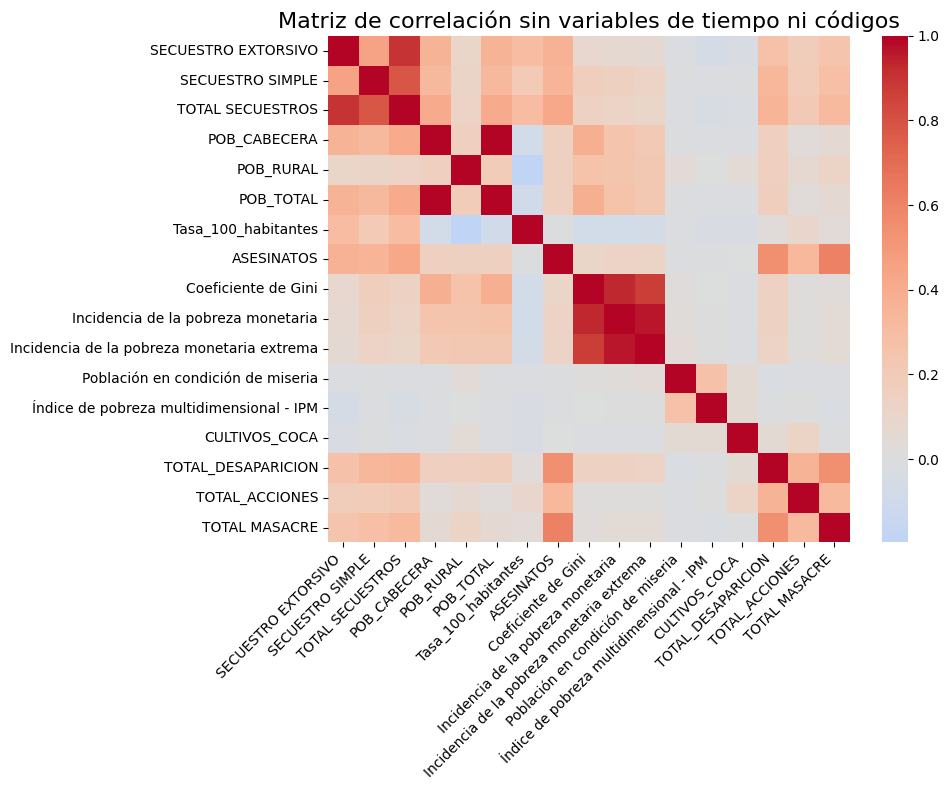

In [8]:
variables_numericas = df.select_dtypes(include=['float64', 'int64'])

# Excluir columnas irrelevantes
columnas_excluir = ['ano', 'mes', 'cod_muni', 'periodo']
variables_filtradas = variables_numericas.drop(columns=columnas_excluir, errors='ignore')

# Calcular la matriz de correlación
corr_matrix = variables_filtradas.corr()

# Graficar el heatmap sin números
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, cbar=True)

plt.title('Matriz de correlación sin variables de tiempo ni códigos', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

$Analisis$
<p style="text-align: justify;">
El análisis de correlación muestra una fuerte relación positiva entre el TOTAL DE SECUESTROS y dos variables principales: SECUESTRO EXTORSIVO (0.90) y SECUESTRO SIMPLE (0.78), lo cual es lógico dado que estas dos categorías componen el total. Además, existe una correlación moderada con variables asociadas a la violencia como ASESINATOS (0.42) y a la población total (0.41), lo que sugiere que los municipios más poblados presentan mayores cifras de secuestro.
</p>
<p style="text-align: justify;">
Otras variables sociales como los indicadores de pobreza (Índice de pobreza multidimensional, pobreza extrema y condición de miseria) muestran una correlación muy baja o cercana a cero con el secuestro, indicando que la pobreza no tiene una relación directa con el número total de secuestros en el conjunto de datos analizado.
</p>
<p style="text-align: justify;">
Por otro lado, variables de criminalidad como TOTAL DE DESAPARICIONES (0.35) y TOTAL MASACRES (0.32) también presentan una correlación positiva, aunque más débil, sugiriendo una posible coexistencia de fenómenos criminales en ciertos territorios.
</p>
<p style="text-align: justify;">
En resumen, el secuestro guarda mayor relación con otras formas de criminalidad y con la concentración poblacional, mientras que la relación con la pobreza es prácticamente nula según la información disponible.
</p>

- CLUSTERING

In [9]:

# Creamos una nueva columna para el periodo en quintiles
df['periodo_quintil'] = pd.qcut(df['ano'], q=5, labels=False) + 1

# Verificar cuántos años caen en cada quintil
conteo_periodos = df.groupby('periodo_quintil')['ano'].nunique()

conteo_periodos


periodo_quintil
1     4
2     3
3     3
4     7
5    13
Name: ano, dtype: int64

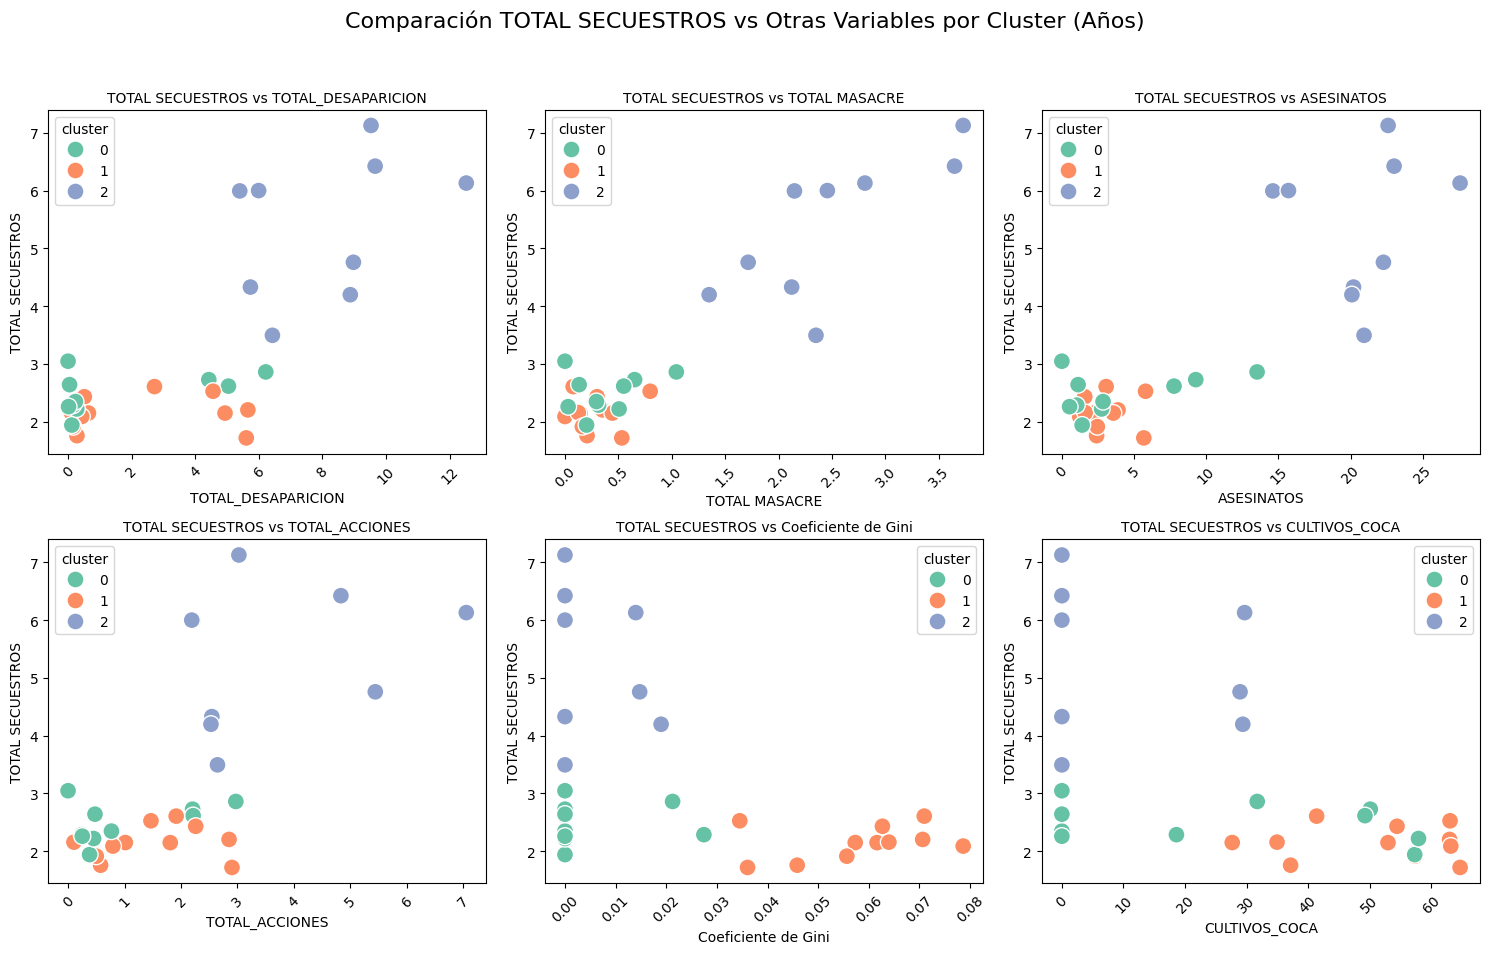

In [21]:
# Variables para el clustering
variables_cluster = ['TOTAL SECUESTROS', 'TOTAL_DESAPARICION', 'TOTAL MASACRE',
                     'ASESINATOS', 'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA']

# Agrupar por año
df_anual = df.groupby('ano')[variables_cluster].mean().reset_index()

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_anual[variables_cluster])

# Clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_anual['cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Tabla de gráficos comparativos
variables_comparacion = ['TOTAL_DESAPARICION', 'TOTAL MASACRE',
                         'ASESINATOS', 'TOTAL_ACCIONES',
                         'Coeficiente de Gini', 'CULTIVOS_COCA']

# Gráfico múltiple tipo matriz
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(variables_comparacion):
    sns.scatterplot(data=df_anual, x=var, y='TOTAL SECUESTROS', hue='cluster',
                    palette='Set2', s=150, ax=axes[idx])
    axes[idx].set_title(f'TOTAL SECUESTROS vs {var}', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Comparación TOTAL SECUESTROS vs Otras Variables por Cluster (Años)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [26]:
# Agrupar años por cluster y obtener rangos
rango_anos = df_anual.groupby('cluster')['ano'].agg(['min', 'max', 'count']).reset_index()
rango_anos = rango_anos.rename(columns={'min': 'Año más antiguo', 'max': 'Año más reciente', 'count': 'Cantidad de años'})

print("Rangos de años por cluster:")
print(rango_anos)

# Tabla con los años listados por cluster
tabla_anos = df_anual[['ano', 'cluster']].sort_values(by='cluster')

tabla_anos





Rangos de años por cluster:
   cluster  Año más antiguo  Año más reciente  Cantidad de años
0        0             2005              2025                10
1        1             2008              2018                11
2        2             1996              2004                 9


,ano,cluster
29,2025,0
27,2023,0
26,2022,0
25,2021,0
24,2020,0
23,2019,0
9,2005,0
10,2006,0
11,2007,0
28,2024,0


$Analisis$

<p style="text-align: justify;">
El análisis de clustering aplicado a los años del periodo 1996–2025 permitió agrupar los años en tres clusters diferenciados con base en el comportamiento promedio de siete variables clave: TOTAL SECUESTROS, TOTAL DESAPARICIONES, TOTAL MASACRES, ASESINATOS, TOTAL ACCIONES, Coeficiente de Gini y CULTIVOS DE COCA. La clasificación temporal evidencia etapas bien definidas en la dinámica de la violencia y las condiciones socioeconómicas del país.
</p>
<p style="text-align: justify;">
El Cluster 2, que agrupa los años entre 1996 y 2004, refleja el periodo con mayor afectación en términos de criminalidad. Durante estos años se registraron los niveles más altos de secuestros, desapariciones, masacres y asesinatos, así como un mayor nivel de presencia de cultivos de coca. Esto coincide con una etapa crítica de conflicto armado y alta incidencia de criminalidad en Colombia.
El Cluster 1 incluye los años 2008 a 2018. Este periodo se caracteriza por un descenso respecto a los niveles críticos de la primera etapa, pero todavía refleja una afectación intermedia, especialmente en indicadores como cultivos ilícitos, desapariciones y algunos casos puntuales de asesinatos y masacres. Es un periodo de transición en el que se presentan reducciones graduales pero sostenidas de los principales indicadores de violencia.
El Cluster 0, con los años más recientes entre 2005 y 2025, muestra los niveles más bajos de secuestros y violencia en general. Se observa una clara reducción de los eventos criminales y un mejor comportamiento en la mayoría de los indicadores. Esto refleja el efecto acumulado de cambios en la dinámica del conflicto, procesos de negociación y modificaciones en el accionar criminal, especialmente desde mediados de la década de 2010 hasta la actualidad.
Interpretación del gráfico comparativo
</p>
<p style="text-align: justify;">
Los gráficos comparativos entre TOTAL SECUESTROS y las demás variables refuerzan visualmente esta interpretación. Los años pertenecientes al Cluster 2 (1996–2004) se concentran en la zona superior derecha de los gráficos, mostrando los valores más altos de criminalidad y conflictividad. Los años del Cluster 1 se ubican en posiciones intermedias con variabilidad según la variable observada, mientras que los años del Cluster 0 se agrupan sistemáticamente en los niveles más bajos de secuestros y demás variables.
</p>
<p style="text-align: justify;">
Este análisis permite identificar de manera clara una evolución decreciente de la violencia y el secuestro en el tiempo, con una concentración histórica del conflicto en los primeros años analizados y una reducción sostenida en las últimas dos décadas. Además, refleja cómo las mejoras no han sido lineales sino que se han presentado por etapas, con periodos intermedios donde la criminalidad persistía en niveles medios.
</p>

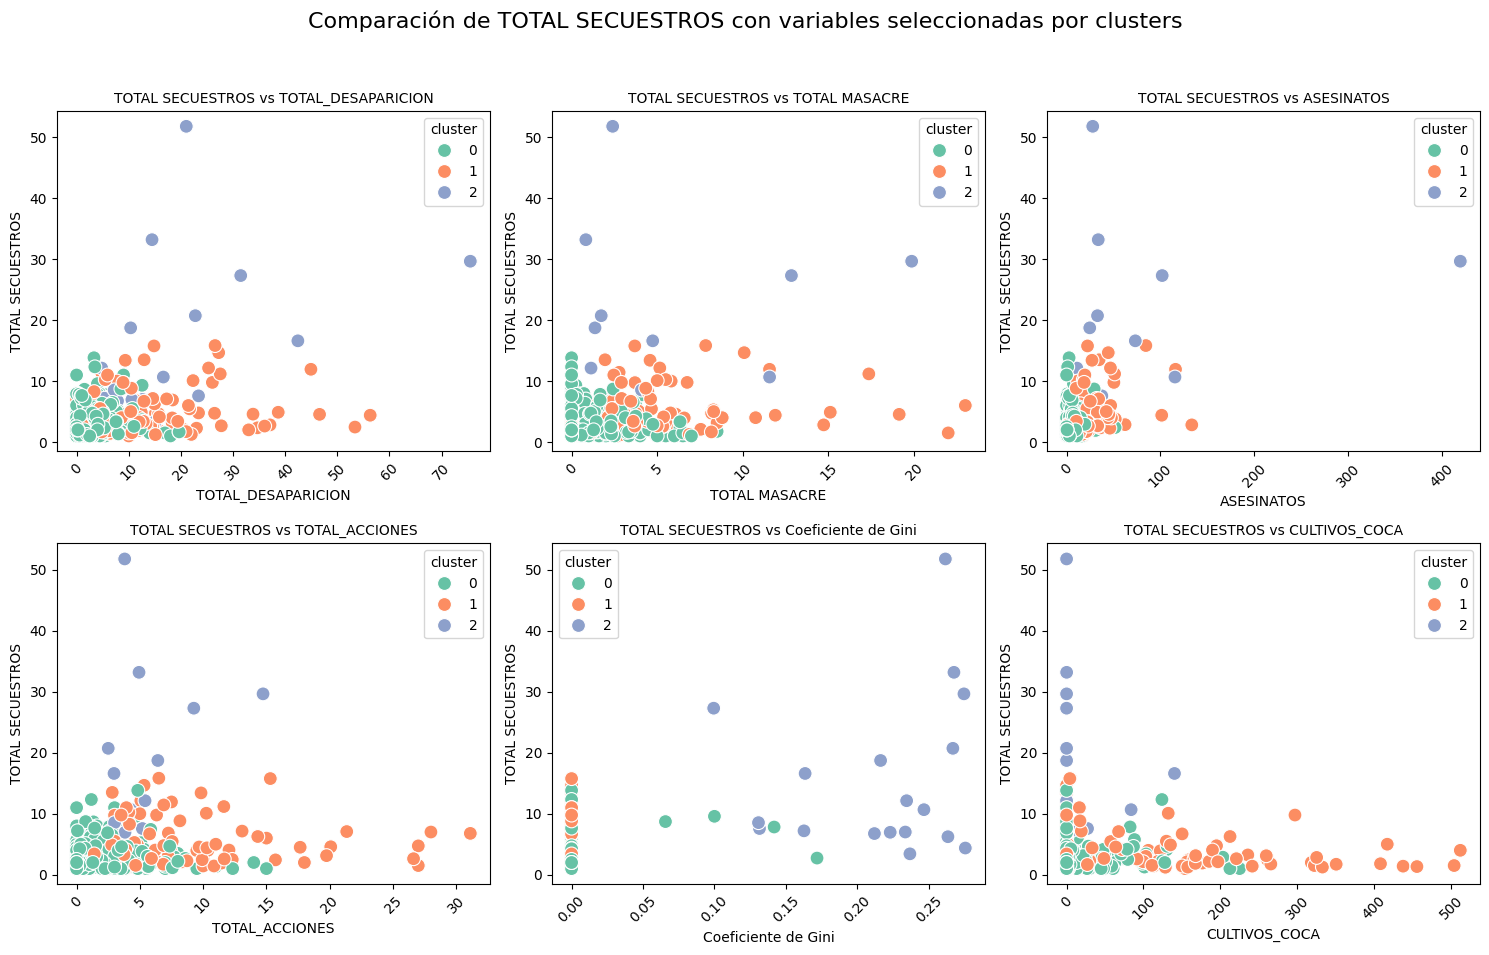

In [17]:

# Variables para clustering
variables_cluster = ['TOTAL SECUESTROS', 'TOTAL_DESAPARICION', 'TOTAL MASACRE',
                     'ASESINATOS', 'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA']

# Promedio por municipio
df_municipio = df.groupby('municipio')[variables_cluster].mean().reset_index()

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_municipio[variables_cluster])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_municipio['cluster'] = kmeans.fit_predict(X_scaled)

# Variables a graficar vs TOTAL SECUESTROS
variables_comparacion = ['TOTAL_DESAPARICION', 'TOTAL MASACRE',
                         'ASESINATOS', 'TOTAL_ACCIONES',
                         'Coeficiente de Gini', 'CULTIVOS_COCA']

# Gráfica en tabla (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(variables_comparacion):
    sns.scatterplot(data=df_municipio, x=var, y='TOTAL SECUESTROS', hue='cluster',
                    palette='Set2', s=100, ax=axes[idx])
    axes[idx].set_title(f'TOTAL SECUESTROS vs {var}', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Comparación de TOTAL SECUESTROS con variables seleccionadas por clusters', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [19]:
# Tabla de municipios por cluster
municipios_por_cluster = df_municipio[['municipio', 'cluster']].sort_values(by='cluster')


# Si quieres ver cuántos municipios hay en cada cluster:
conteo = municipios_por_cluster['cluster'].value_counts().sort_index()
print("\nCantidad de municipios por cluster:\n", conteo)



Cantidad de municipios por cluster:
 cluster
0    776
1    115
2     18
Name: count, dtype: int64


$Analisis$
<p style="text-align: justify;">
El análisis de clustering realizado con las variables de criminalidad y condiciones socioeconómicas permitió clasificar a los municipios colombianos en tres grupos diferenciados. La mayor parte de los municipios, un total de 776, se agruparon en el Cluster 0, caracterizado por presentar los valores más bajos de secuestros, desapariciones, masacres, asesinatos, acciones violentas, cultivos de coca y desigualdad (medida por el coeficiente de Gini). Este grupo representa a la mayoría del país, donde la incidencia de estos fenómenos es relativamente baja o contenida.
</p>
<p style="text-align: justify;">
Por su parte, 115 municipios conforman el Cluster 1, el cual refleja niveles intermedios de afectación. Estos territorios muestran mayores niveles de violencia y presencia de cultivos ilícitos en comparación con el Cluster 0, pero sin alcanzar las cifras extremas del grupo más crítico. Finalmente, el Cluster 2, compuesto únicamente por 18 municipios, concentra los niveles más altos en todas las variables analizadas. Aunque representan una proporción reducida del total (menos del 2%), estos municipios son los más afectados, reflejando una fuerte concentración territorial del crimen y fenómenos asociados.
</p>

Para el análisis visual de la relación entre secuestros y otras variables

<p style="text-align: justify;">
La visualización mediante gráficos comparativos muestra claramente la concentración de los municipios del Cluster 2 en los niveles más altos de secuestros frente a las demás variables. En todos los gráficos se observa que, a medida que aumentan los valores de desapariciones, masacres, asesinatos, acciones violentas, cultivos de coca y desigualdad, se incrementa también el número total de secuestros. Esta tendencia es especialmente marcada en los municipios clasificados en el Cluster 2, que se sitúan visiblemente en los cuadrantes superiores de cada gráfico.
</p>
<p style="text-align: justify;">
Además, los municipios del Cluster 1 muestran una dispersión intermedia, con algunos casos aislados de alta violencia pero sin concentraciones extremas, mientras que los municipios del Cluster 0 permanecen agrupados en los niveles bajos de todas las variables. Este análisis gráfico confirma que los municipios con mayor afectación en términos de secuestros no solo registran más víctimas, sino que coinciden con territorios donde otros indicadores de criminalidad y desigualdad también son críticos.
</p>
<p style="text-align: justify;">
Por lo tanto, la clasificación de municipios como los gráficos sugieren que el fenómeno del secuestro en Colombia se encuentra fuertemente asociado con otros indicadores de criminalidad y condiciones socioeconómicas precarias, y se encuentra geográficamente concentrado en un número reducido pero altamente afectado de municipios.
</p>


- REGRESIÓN LINEAL

In [57]:
# Cargar datos (puedes cambiar a df_municipio o df_anual según lo que analices)
df_modelo = df_anual.copy()

# Variables independientes sin interacciones
X = df_modelo[['TOTAL_DESAPARICION', 'TOTAL MASACRE', 'ASESINATOS', 
               'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA']]
y = df_modelo['TOTAL SECUESTROS']

# ---- 1. VIF sin interacciones ----
X_with_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(len(X.columns))]
print("VIF sin interacciones:\n", vif)

# ---- 2. R² sin interacciones ----
model_simple = LinearRegression().fit(X, y)
y_pred_simple = model_simple.predict(X)
r2_simple = r2_score(y, y_pred_simple)
print("\nR² sin interacciones:", r2_simple)

# ---- 3. Con interacciones ----
df_modelo['SECUESTROS_X_GINI'] = df_modelo['TOTAL SECUESTROS'] * df_modelo['Coeficiente de Gini']
df_modelo['SECUESTROS_X_COCA'] = df_modelo['TOTAL SECUESTROS'] * df_modelo['CULTIVOS_COCA']

X_inter = df_modelo[['TOTAL_DESAPARICION', 'TOTAL MASACRE', 'ASESINATOS', 
                     'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA',
                     'SECUESTROS_X_GINI', 'SECUESTROS_X_COCA']]

# VIF con interacciones
X_inter_with_const = sm.add_constant(X_inter)
vif_inter = pd.DataFrame()
vif_inter["Variable"] = X_inter.columns
vif_inter["VIF"] = [variance_inflation_factor(X_inter_with_const.values, i + 1) for i in range(len(X_inter.columns))]
print("\nVIF con interacciones:\n", vif_inter)

# R² con interacciones
model_inter = LinearRegression().fit(X_inter, y)
y_pred_inter = model_inter.predict(X_inter)
r2_inter = r2_score(y, y_pred_inter)
print("\nR² con interacciones:", r2_inter)

# ---- 4. Comparar coeficientes ----
coef_simple = pd.Series(model_simple.coef_, index=X.columns)
coef_inter = pd.Series(model_inter.coef_, index=X_inter.columns)

print("\nCoeficientes sin interacciones:\n", coef_simple)
print("\nCoeficientes con interacciones:\n", coef_inter)


NameError: name 'df_anual' is not defined

In [58]:
# Cargar datos
df_modelo = df_anual.copy()

# Variables independientes (sin interacciones)
X = df_modelo[['TOTAL_DESAPARICION', 'TOTAL MASACRE', 'ASESINATOS',
               'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA']]
y = df_modelo['TOTAL SECUESTROS']

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Coeficientes
coeficientes = pd.Series(model.coef_, index=X.columns)
print("Coeficientes del modelo:")
print(coeficientes)

# R²
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"\nR² del modelo sin interacciones: {r2:.3f}")

# Gráfico de residuos (opcional)
residuos = y - y_pred
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()


NameError: name 'df_anual' is not defined

In [59]:

# Datos (usando df_anual como ejemplo)
df_modelo = df_anual.copy()

# Variables independientes
X = df_modelo[['TOTAL_DESAPARICION', 'TOTAL MASACRE', 'ASESINATOS',
               'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA']]
y = df_modelo['TOTAL SECUESTROS']

# Ajuste del modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes probar con otros valores de alpha
ridge_model.fit(X, y)

# Coeficientes Ridge
coef_ridge = pd.Series(ridge_model.coef_, index=X.columns)
print("Coeficientes del modelo Ridge:")
print(coef_ridge)

# R² Ridge
y_pred_ridge = ridge_model.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)
print(f"\nR² con Ridge: {r2_ridge:.3f}")

# Comparar R² con modelo lineal tradicional
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X, y)
r2_lineal = r2_score(y, linear_model.predict(X))
print(f"R² con regresión lineal: {r2_lineal:.3f}")


NameError: name 'df_anual' is not defined

In [53]:
!pip install statsmodels

  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmod

In [61]:
df.columns

Index(['key', 'municipio', 'departamento', 'ano', 'mes', 'fecha_hecho',
       'cod_muni', 'SECUESTRO EXTORSIVO', 'SECUESTRO SIMPLE',
       'TOTAL SECUESTROS', 'POB_CABECERA', 'POB_RURAL', 'POB_TOTAL',
       'Tasa_100_habitantes', 'periodo', 'ASESINATOS', 'Coeficiente de Gini',
       'Incidencia de la pobreza monetaria',
       'Incidencia de la pobreza monetaria extrema',
       'Población en condición de miseria',
       'Índice de pobreza multidimensional - IPM', 'CULTIVOS_COCA',
       'TOTAL_DESAPARICION', 'TOTAL_ACCIONES', 'TOTAL MASACRE'],
      dtype='object')

In [32]:
# Datos base
X = df_anual[['TOTAL_DESAPARICION', 'TOTAL MASACRE', 'ASESINATOS',
              'TOTAL_ACCIONES', 'Coeficiente de Gini', 'CULTIVOS_COCA']]
y = df_anual['TOTAL SECUESTROS']

# ---- OLS clásico ----
X_const = sm.add_constant(X)
modelo_ols = sm.OLS(y, X_const).fit()

print("=== OLS COMPLETO ===")
print(modelo_ols.summary())

# ---- VIF (sin penalización) ----
vif_df = pd.DataFrame()
vif_df['Variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
print("\n=== VIF sin regularización ===")
print(vif_df)

# ---- Ridge ----
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)

print(f"\n=== Ridge ===\nR² Ridge: {r2_ridge:.3f}")
print("Coeficientes Ridge:\n", pd.Series(ridge.coef_, index=X.columns))

# ---- Comparación R² ----
print(f"\nR² OLS clásico: {modelo_ols.rsquared:.3f}")


=== OLS COMPLETO ===
                            OLS Regression Results                            
Dep. Variable:       TOTAL SECUESTROS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     32.62
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           3.88e-10
Time:                        10:44:03   Log-Likelihood:                -22.275
No. Observations:                  30   AIC:                             58.55
Df Residuals:                      23   BIC:                             68.36
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const        

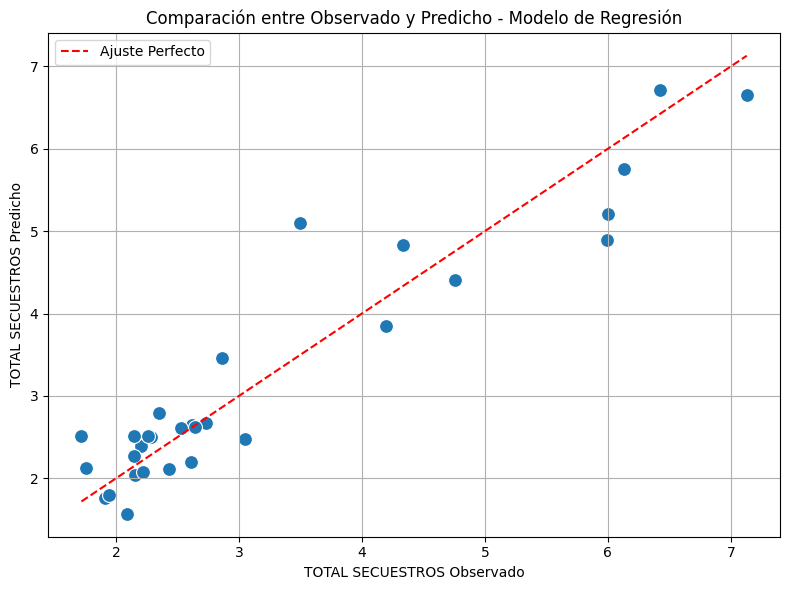

In [33]:

# y son los valores reales, y_pred los valores predichos del modelo elegido (Ridge o OLS)
# Ejemplo: para Ridge
y_pred = ridge.predict(X)
# Si quieres OLS:
# y_pred = model.predict(sm.add_constant(X))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, s=100)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ajuste Perfecto')
plt.xlabel('TOTAL SECUESTROS Observado')
plt.ylabel('TOTAL SECUESTROS Predicho')
plt.title('Comparación entre Observado y Predicho - Modelo de Regresión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


$Analisis$
<p style="text-align: justify;"> 
Para el análisis estadístico, se implementó una estrategia gradual con el fin de explicar la variabilidad del TOTAL DE SECUESTROS a partir de un conjunto de variables relacionadas con criminalidad y factores socioeconómicos. El proceso consistió en distintas etapas para evaluar la estabilidad, la capacidad explicativa y la robustez del modelo.
</p>
<p style="text-align: justify;">
En primer lugar, se aplicó un modelo de regresión lineal múltiple tradicional, incluyendo tanto un modelo sin interacciones como otro con interacciones específicas. En el modelo con interacciones se incluyeron multiplicaciones cruzadas entre TOTAL SECUESTROS × Coeficiente de Gini y TOTAL SECUESTROS × CULTIVOS_COCA, con el objetivo de evaluar si la combinación de variables socioeconómicas y criminales generaba un efecto adicional sobre los niveles de secuestro.
</p>
<p style="text-align: justify;">
Los resultados iniciales mostraron que, aunque el modelo con interacciones alcanzaba un R² más alto (0.93), el análisis de multicolinealidad mediante el VIF (Variance Inflation Factor) evidenció un deterioro significativo de la estabilidad del modelo. El VIF se disparó a niveles extremos (superiores a 100 en algunas variables), indicando colinealidad severa y riesgo de sobreajuste. Por otro lado, el modelo sin interacciones presentó un R² de 0.89, con un ajuste muy aceptable y menor riesgo de distorsión estadística.
</p>
<p style="text-align: justify;">
Ante estos hallazgos, se optó por explorar un modelo más robusto frente a colinealidad: la regresión Ridge, que introduce una penalización que reduce el impacto de multicolinealidad y previene el sobreajuste. El modelo Ridge mantuvo un R² alto (0.92), mostrando una capacidad explicativa sólida con una mayor estabilidad de los coeficientes, especialmente frente a las variables más correlacionadas entre sí.
</p>
<p style="text-align: justify;">
Finalmente, se realizó un análisis completo con un modelo OLS sin interacciones para obtener la inferencia clásica (p-values, t-student, errores estándar), confirmando que las variables TOTAL MASACRE y CULTIVOS_COCA eran las únicas estadísticamente significativas. Las demás variables, aunque incluidas, no presentaron evidencia robusta de efecto estadístico.
</p>
<p style="text-align: justify;">
El análisis evidenció que los secuestros presentan una fuerte relación con fenómenos violentos como las masacres y, en menor medida, con la presencia de cultivos ilícitos. El uso del modelo Ridge permitió validar que el modelo mantiene un poder explicativo alto sin caer en problemas de colinealidad severa. Aunque el modelo clásico OLS mostró buenos resultados en términos de R², el Ridge demostró una mayor estabilidad y confiabilidad para análisis predictivos y de tendencia.
</p>
<p style="text-align: justify;">
Se concluye que la regresión Ridge es el modelo más adecuado para explicar las dinámicas del TOTAL DE SECUESTROS, ofreciendo un balance entre robustez estadística y poder explicativo, mientras que la regresión clásica aporta elementos valiosos para la interpretación causal de los coeficientes más significativos.
</p>
<p style="text-align: justify;"> 
La validez del modelo Ridge se refuerza mediante la gráfica de dispersión observados vs predichos, donde se aprecia una adecuada alineación de los valores calculados con los valores reales de secuestros. La concentración de puntos alrededor de la línea de ajuste perfecto demuestra que el modelo predice correctamente tanto los valores bajos como los valores medios de secuestros, y mantiene un comportamiento estable en los casos más extremos. Esto confirma la solidez del modelo para fines explicativos y predictivos. En conjunto, la evidencia empírica respalda la utilización del modelo Ridge como una herramienta adecuada para comprender las dinámicas del secuestro, equilibrando poder explicativo y robustez estadística.
</p>


- ANALISIS ESPACIAL CON GEOPANDAS

In [6]:
!pip install Unidecode


  Using cached Unidecode-1.4.0-py3-none-any.whl.metadata (13 kB)
Using cached Unidecode-1.4.0-py3-none-any.whl (235 kB)


In [51]:

import unidecode
mapa_colombia = gpd.read_file("colombia_municipios.geojson")
#mapa_colombia.plot(figsize=(10, 12))

# Normaliza nombres de municipio (minúsculas, sin tildes)
df['municipio'] = df['municipio'].str.lower().apply(unidecode.unidecode)
mapa_colombia['nombre_mpi'] = mapa_colombia['nombre_mpi'].str.lower().apply(unidecode.unidecode)

# Unión por el nombre del municipio
mapa_con_secuestros = mapa_colombia.merge(df, left_on='nombre_mpi', right_on='municipio', how='left')



In [24]:
!pip install matplotlib-scalebar

c:\Users\Acer\miniconda3\envs\secuestro\Lib\site-packages\mapclassify\classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


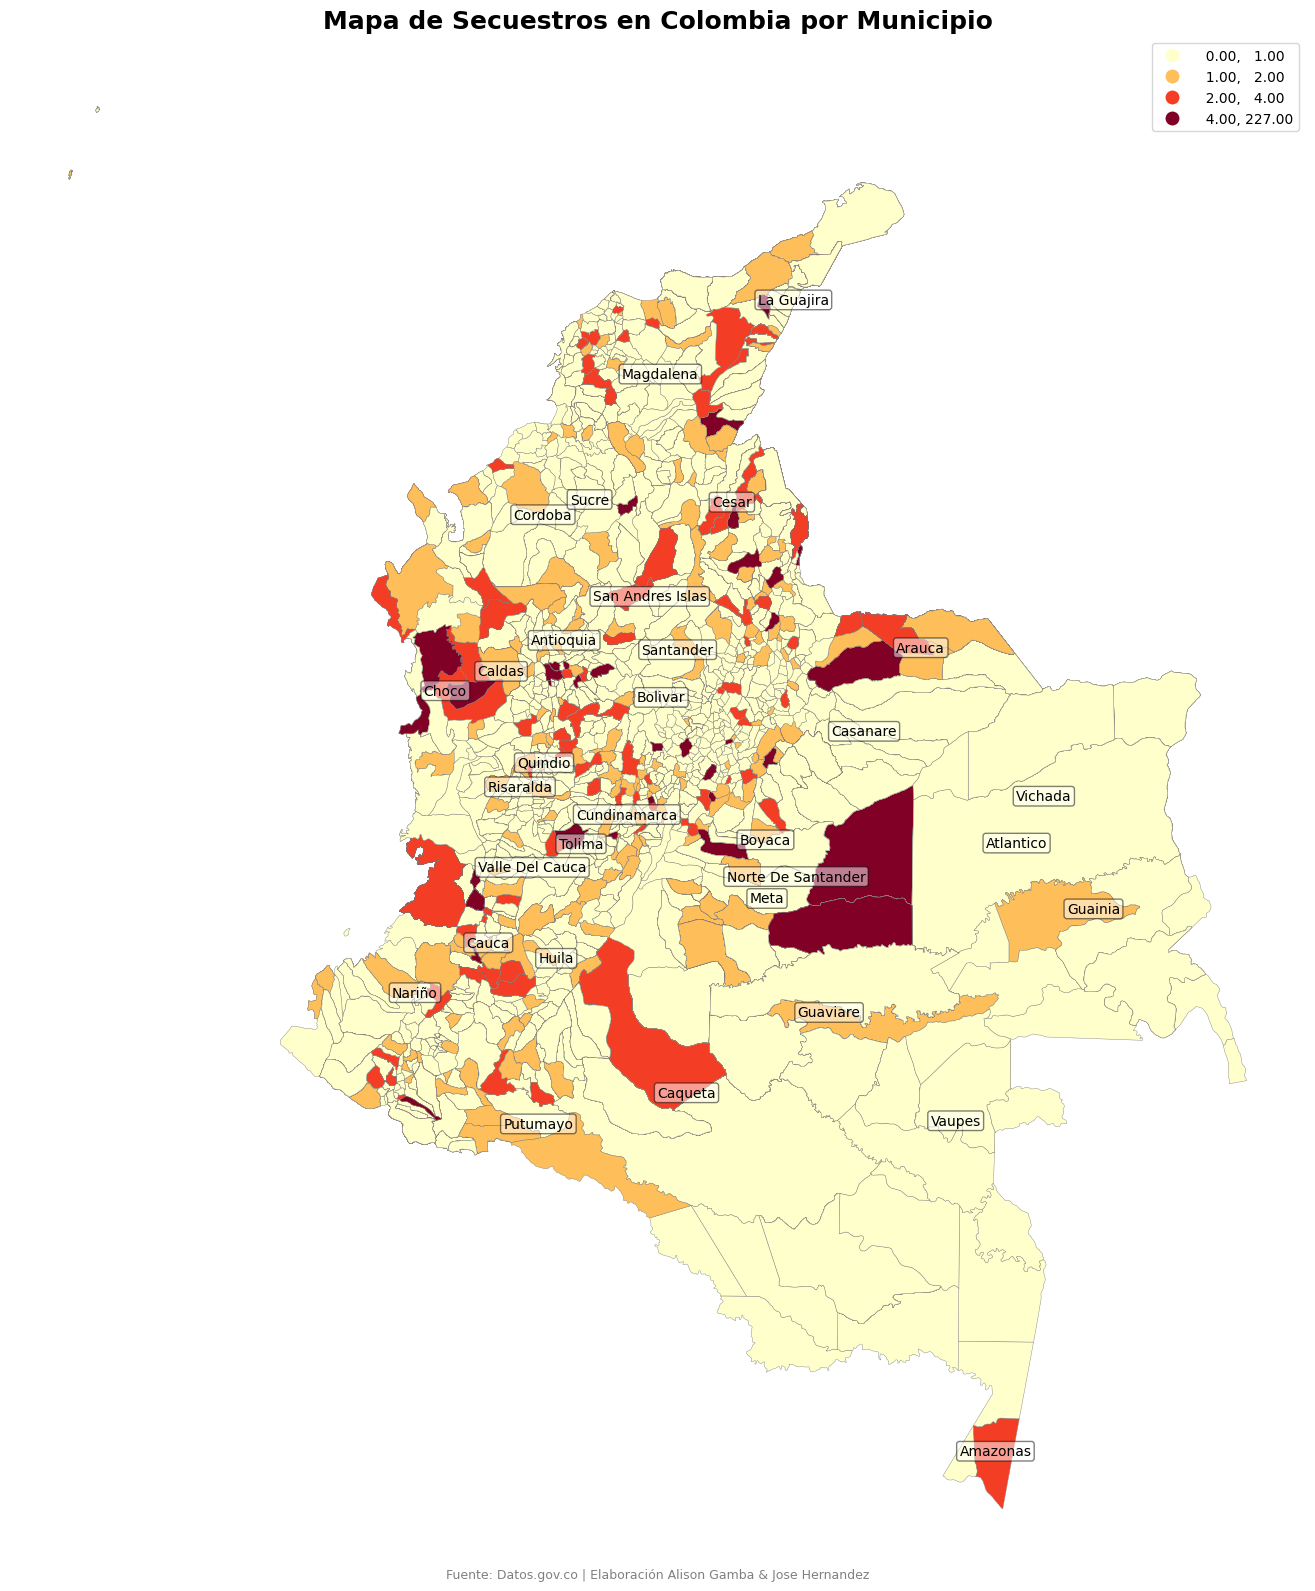

In [52]:
mapa_con_secuestros['TOTAL SECUESTROS'] = mapa_con_secuestros['TOTAL SECUESTROS'].fillna(0)

# Crear figura
fig, ax = plt.subplots(figsize=(14, 16))

# Mapa base con esquema de cuantiles
mapa_con_secuestros.plot(
    column='TOTAL SECUESTROS',
    cmap='YlOrRd',
    linewidth=0.3,
    edgecolor='gray',
    legend=True,
    scheme='Quantiles',  # Aquí está la clave
    k=5,  # Número de categorías o colores
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Sin datos"}
)

# Agrupar por departamento y colocar nombres
if 'departamento' in mapa_con_secuestros.columns:
    departamentos = mapa_con_secuestros.dissolve(by='departamento', as_index=False)
    for idx, row in departamentos.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            row['departamento'].title(),
            xy=(centroid.x, centroid.y),
            fontsize=10,
            ha='center',
            bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.2')
        )

# Estética
ax.set_title("Mapa de Secuestros en Colombia por Municipio", fontsize=18, fontweight='bold')
ax.axis('off')
fig.text(0.5, 0.01, 'Fuente: Datos.gov.co | Elaboración Alison Gamba & Jose Hernandez', ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()


$Analisis$
<p style="text-align: justify;">
El mapa muestra cómo se distribuyen los secuestros en Colombia por municipio. Se observa que la mayoría de los municipios tienen entre 1 y 50 casos, lo cual indica una baja concentración en muchas zonas del país. Sin embargo, algunos municipios destacan con cifras más altas, entre 100 y 227 secuestros, especialmente en regiones del suroccidente y zonas del nororiente. Esto puede deberse a factores como presencia de grupos armados, conflicto o poca presencia del Estado. El uso de colores permite identificar fácilmente las zonas más afectadas. Este visualización permite entender más facil donde se encuentran las regiones más afectadas y que eventualmente podriamos relacionar con otro tipo de eventos o variables que se presentan tambien. Destaca en este grafico las zonas fronterizas. 
</p>

#### $7)$ $Conclusiones$

- Síntesis de hallazgos.
- Reflexiones críticas.
- Posibles líneas de análisis futuro.

- Síntesis de hallazgos.
<p style="text-align: justify;">
Hemos encontrado una relación significativa entre el número de secuestros y la presencia de cultivos de coca y asesinatos en distintas regiones, visto y desagregado por municipios. Se evidencia que donde hay más siembras de coca o un mayor número de asesinatos, los secuestros también tienden a aumentar. La región es un factor clave, ya que la intensidad de esta correlación varía mucho de un lugar a otro, siendo los municipios fronterizos los más impactados y en regiones donde historicamente ha existido presencia de grupos armados. Otros delitos como las masacres también muestran un vínculo, aunque quizás no tan fuerte.
</p>

- Reflexiones críticas.
<p style="text-align: justify;">
Es crucial entender que estas correlaciones no implican necesariamente una causa directa. Podría ser que todos estos fenómenos, incluidos los secuestros, sean síntomas de condiciones subyacentes más complejas, como la debilidad institucional o la presencia de grupos armados ilegales. Es decir, no es que un asesinato cause un secuestro, sino que ambos podrían ser consecuencias de un mismo entorno de inestabilidad y conflicto. Historicamente y especialmente para la decada del 90, Colombia tuvo un entorno particular en el marco del narcotrafico, donde el numero de secuestros y otras variables aumentó considerablemente, se podria denominar a este fenomeno como la era critica por el nivel de violencia que ejercian los capos del narcotrafico contra población civil y militar. Estos datos concentrados y pico estadistico se evidencia en los diferentes histogramas y mapas a lo largo de los puntos desarrollados, en un escenario paralelo donde no exista este aumento exponencial por el narcotrafico, es completamente claro que las datos tendrian una visualización completamente diferente. A nivel mundial, los fenomenos de violencia caracterizados por la presencia de grupos armados, guerrillas, conflictos politicos y religiosos, los datos pueden tener altas concentraciones en lineas de tiempo, regiones y sectores de la población.
</p>

- Posibles líneas de análisis futuro.
<p style="text-align: justify;">
Para entender mejor este fenómeno, podríamos profundizar en el contexto socioeconómico de las regiones más afectadas. Sería útil analizar la presencia y dinámica de grupos armados, así como el impacto de políticas de seguridad específicas. También podríamos explorar la evolución temporal de estas variables para ver cómo interactúan a lo largo del tiempo. Como consideración especial podriamos evaluar el impacto de un fenomeno claro como el narcoterrismo de la epoca de los años 90, evaluar cual seria el impacto (disminución) sin este tipo de fenomenos que aumentan exponecialmente los eventos que incrementan los datos y cifras para un periodo especifico, que en todo caso no se puede obviar ni anular dentro del analisis de los ultimos 30 años en materia de los secuestros en Colombia.
</p>


#### $8)$ $Anexos$ $y$ $Bibliografía$

- Códigos relevantes que no se mostraron en el cuerpo principal.


- Fuentes de datos con enlaces y descripción de uso.

<p style="text-align: justify;">
Realizamos uso de diferentes fuentes para construir una base de datos (DF) más robusta y con variables nuevas que permitan alaizar y comparar el impacto de estas sobre nuestra variable dependiende; total secuestros, para la construcción de estas variables y robustez del DF utilizamos información consignada en la pagina de datos abiertos, el DANE, Terridata, centro de memoria historica e incluso un archivo en Github que contiene el geojson con los minucipios de Colombia para su uso mediante geopandas. Construimos nuevas variables como; población total, población rural, numero de masacres, victimas, hectareas de cultivos de coca, homicidos, decersión en población de 6 a 16 años, entre otras que permitieron realizar un analisis profundo en uno de los crimenes que afectan gravemente a nuestro pais; secuestros.
</p>

* https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/datos-geoestadisticos/ MAPA DE COLOMBIA
* https://www.dane.gov.co/index.php/estadisticas-por-tema/demografia-y-poblacion/proyecciones-de-poblacion POBLACION
* https://www.datos.gov.co/Seguridad-y-Defensa/HOMICIDIO/m8fd-ahd9/data_preview HOMICIDIOS
* https://dane.maps.arcgis.com/apps/MapJournal/index.html?appid=54595086fdd74b6c9effd2fb8a9500dc IPM
* https://docs.google.com/spreadsheets/d/1ITvbEU79Ok_GhaDmN12mCeHBFfBzoa4GfNT68wyAnXo/edit?gid=1514359174#gid=1514359174 CONFLICTO ARMADO
* https://terridata.dnp.gov.co/index-app.html#/descargas IPM
* https://terridata.dnp.gov.co/index-app.html#/descargas PIB PERCÁPITA
* https://micrositios.centrodememoriahistorica.gov.co/observatorio/portal-de-datos/base-de-datos/ CASOS DE DESAPARICIÓN FORZADA
* https://www.datos.gov.co/Educaci-n/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR-B-SICA/sras-4t5p/about_data DECERSIÓN EDUCATIVA
* https://gist.github.com/john-guerra/727e8992e9599b9d9f1dbfdc4c8e479e GEOJSON-MUNICIPIOS

- Si usaron APIs o scraping, documentarlo.

No se hizo uso de APIs o Scraping para la constucción de la base de datos, ni para su alisis y entega de estos resultados.